## Machine Learning

### Creating a logistic regression to predict Excessive absenteeism

In [27]:
# import relevant libraries
import numpy as np
import pandas as pd

#SKLearn ML
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#for model evaluation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from yellowbrick.classifier import ClassificationReport

# using pickel module to convert a python object into a character stream
# this involves saving the reg variable into a file, which can be loaded into a new notebook for usage
# model can also be saved as a JSON file
import pickle


In [5]:
# load the data
data_preprocessed = pd.read_csv('../data/preprocessed.csv')
data_preprocessed

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,3,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,5,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,5,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,4,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,5,4,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,5,5,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,5,5,235,16,32,237.656,25,1,0,0,2


### Create the targets

In [6]:
# using logistics regression
# creating classes; moderately absent, excessively absent
# using the median vlaue of the 'Absenteeism Time in Hours' as a cut-off line
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [7]:
# moderately absent (<= 3hours), excessively absent(>= 4 hours)
# moderately absent = 0, excessively absent = 1
# create a variable to predict this targets (0 & 1)
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                    data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [8]:
# add the target data to the dataframe
data_preprocessed['Excessive Absenteeism'] = targets
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,3,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,5,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,5,289,36,33,239.554,30,0,2,1,2,0


In [9]:
# checking the targets distribution
targets.sum() / targets.shape[0]

0.45571428571428574

In [10]:
# dropping the absentism column
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours', 'Day', 'Daily Work Load Average', 'Distance to Work'], axis = 1)
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


## Selecting the inputs for the regression

In [11]:
data_with_targets.shape

(700, 12)

In [12]:
# selecting the inputs excluding the last column 'extreme absenteeism'
unscaled_inputs = data_with_targets.iloc[:, :-1]
unscaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0
696,1,0,0,0,5,225,28,24,0,1,2
697,1,0,0,0,5,330,28,25,1,0,0
698,0,0,0,1,5,235,32,25,1,0,0


## Standardize the Data

In [13]:
#from sklearn.preprocessing import StandardScaler

# create an object to subtract the mean and divide by the SD featurewise
#absenteeism_scalar = StandardScaler()

In [14]:

# create a custom scaler so as to choose which input to standardize.
# this allows the exclusion of the dummy varaibles columns from being standardized
# alternatively, one can standardize the dataset before creating dummy variables.
class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [15]:
# checking the column values in the unscaled data frame
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [16]:
#columns_to_scale = ['Year', 'Month', 'Day', 'Transportation Expense', 'Distance to Work', 'Age',
 #      'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets']

columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Education']

In [17]:
#using list comprehension to find columns that needs scaling
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [18]:
absenteeism_scaler = CustomScaler(columns_to_scale)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [19]:
# fit input data (calculate and store the mean and SD)
absenteeism_scaler.fit(unscaled_inputs)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CustomScaler(columns=['Month', 'Transportation Expense', 'Age',
                      'Body Mass Index', 'Children', 'Pets'],
             copy=None, with_mean=None, with_std=None)

In [20]:
# transforming the unscaled inputs with the information contained in the absenteeism scalar. ie subtracting by the mean and dividing by the SD
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.030796,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.030796,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.030796,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.030796,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.030796,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.568019,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.568019,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.568019,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.568019,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


### Spilt the data into train & test and shuffle

In [21]:
train_test_split(scaled_inputs, targets)

[     Reason_1  Reason_2  Reason_3  Reason_4     Month  Transportation Expense  \
 363         0         0         0         1  0.629611                1.005844   
 666         0         0         0         1 -0.867426               -0.654143   
 463         1         0         0         0  0.929019                0.688938   
 488         0         0         0         1  0.330204               -0.654143   
 223         0         0         0         1 -0.268611                1.036026   
 ..        ...       ...       ...       ...       ...                     ...   
 289         0         0         0         1 -0.568019                1.005844   
 678         0         0         0         1  0.629611                0.190942   
 274         1         0         0         0  1.527833                0.356940   
 122         0         0         0         1  1.527833                0.040034   
 436         1         0         0         0 -0.568019                1.624567   
 
           Age

Above output consists of:
* array 1: a training dataset with inputs
* array 2: a training dataset with targets
* array 3: a test dataset with inputs
* array 4: a test dataset with targets

In [22]:
# declare four variables to contain the split outputs
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20) 

In [23]:
# view output shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(560, 11) (560,)
(140, 11) (140,)


## XGBoost Model

In [24]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
prediction_xgb = xgb_model.predict(x_test)
xgb_score = accuracy_score(y_test, prediction_xgb)*100
print(f"The accuracy of the XGBoost Model is {round(xgb_score, 2)}%")

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the XGBoost Model is 76.43%


### The XGBoost Classification Report

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:02:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


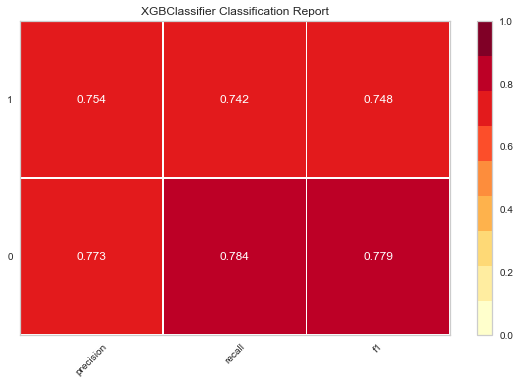

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [28]:
xgb_model = XGBClassifier()
xgb_model = ClassificationReport(xgb_model, support=False)
xgb_model.fit(x_train, y_train)
xgb_model.score(x_test, y_test)
xgb_model.show()

## Logistic regression with sklearn

### Training the model

In [30]:
#declare and fit a logistic regression object
logistic_model = LogisticRegression(max_iter=1000).fit(x_train,y_train)
prediction_logistics = logistic_model.predict(x_test)
logistic_score = accuracy_score(y_test, prediction_logistics)*100
print(f"The accuracy of the Logistic Regression Model is{round(logistic_score, 2)}%")

The accuracy of the Logistic Regression Model is73.57%


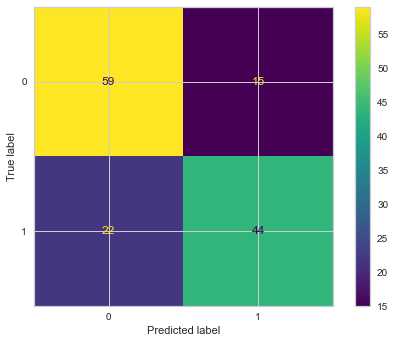

In [34]:
plot_confusion_matrix(logistic_model, x_test, y_test)

In [25]:

### Manually check the accuracy

#find the outputs 
# model_outputs = reg.predict(x_train)
# model_outputs # shows the prediction of the model

#and compare with the targets
# model_outputs == y_train

#calculate the number of correct predictions
# np.sum((model_outputs==y_train))

#number of outputs
# model_outputs.shape[0]

#Accuracy = Correct predictions / # observations
# np.sum((model_outputs==y_train)) / model_outputs.shape[0]


to use this model outside of python (Tableau), we need to create a function, to enable easy usuage within Tableau

#### Finding the intercept and coefficients

In [26]:
# finding intercept
reg.intercept_

array([-1.60957471])

In [27]:
#finding the coefficient
reg.coef_

array([[ 2.77151176,  0.93168817,  3.09210221,  0.8090592 ,  0.00781237,
         0.62505482, -0.17390339,  0.28829409, -0.24081615,  0.35753531,
        -0.27337422]])

In [28]:
# to know the variable these variables refer to
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [29]:
# best practice to define a variale to contain this info
feature_name = unscaled_inputs.columns.values

In [30]:
#creating a dataframe to contain the feature_names and the corresponding coefficient
summary_table = pd.DataFrame (columns=['feature name'], data = feature_name)

# matching the names with the coeffiecient
summary_table['coefficient'] =np.transpose(reg.coef_) #transpose because ndarrays are rows not columns
summary_table

,feature name,coefficient
0,Reason_1,2.771512
1,Reason_2,0.931688
2,Reason_3,3.092102
3,Reason_4,0.809059
4,Month,0.007812
5,Transportation Expense,0.625055
6,Age,-0.173903
7,Body Mass Index,0.288294
8,Education,-0.240816
9,Children,0.357535


In [31]:
# appending the intercept
# to shift the index of thee summary table so that the intercept comes first
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,feature name,coefficient
0,intercept,-1.609575
1,Reason_1,2.771512
2,Reason_2,0.931688
3,Reason_3,3.092102
4,Reason_4,0.809059
5,Month,0.007812
6,Transportation Expense,0.625055
7,Age,-0.173903
8,Body Mass Index,0.288294
9,Education,-0.240816


## Interpreting the coefficients

"""
Remember, coefficient = weight and intercepts = bias. the weight shows how we weigh a certain input, the closer they are to zero, the smaller the weight... 
this holds for models where all variables are of the same scale, like this model.
Standardized coefficients are basically coefficients of a regression where all variables have been standardized. 
it's advised to standard the variables like in this model.
In logistic Regression, coefficient predicted are the 'log(odds). logistic regreesion by default are linear function, predicting log(odds). 
these log(odds) are later transformed into zero's and one's
"""

In [32]:
# find the exponentials of the coefficient, to make them more interpretable
summary_table['odds_ratio'] = np.exp(summary_table.coefficient)
summary_table

,feature name,coefficient,odds_ratio
0,intercept,-1.609575,0.199973
1,Reason_1,2.771512,15.982778
2,Reason_2,0.931688,2.538791
3,Reason_3,3.092102,22.023327
4,Reason_4,0.809059,2.245794
5,Month,0.007812,1.007843
6,Transportation Expense,0.625055,1.868348
7,Age,-0.173903,0.840378
8,Body Mass Index,0.288294,1.334150
9,Education,-0.240816,0.785986


In [33]:
# sort the dataframe by the 'odds_ratio' column
summary_table.sort_values('odds_ratio', ascending = False)


,feature name,coefficient,odds_ratio
3,Reason_3,3.092102,22.023327
1,Reason_1,2.771512,15.982778
2,Reason_2,0.931688,2.538791
4,Reason_4,0.809059,2.245794
6,Transportation Expense,0.625055,1.868348
10,Children,0.357535,1.429801
8,Body Mass Index,0.288294,1.334150
5,Month,0.007812,1.007843
7,Age,-0.173903,0.840378
9,Education,-0.240816,0.785986


if a coefficient is around zero or it's odd ratio is close to 1 = corresponding feature isn't particularly important

#### Testing the model

In [34]:
reg.score(x_test,y_test)

0.7357142857142858

In [35]:
# getting the probability of an output being 0 or 1
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.75466347, 0.24533653],
       [0.60917591, 0.39082409],
       [0.48329093, 0.51670907],
       [0.75768232, 0.24231768],
       [0.08357741, 0.91642259],
       [0.3052464 , 0.6947536 ],
       [0.303675  , 0.696325  ],
       [0.11636888, 0.88363112],
       [0.7400284 , 0.2599716 ],
       [0.75596036, 0.24403964],
       [0.50609784, 0.49390216],
       [0.19501503, 0.80498497],
       [0.06248668, 0.93751332],
       [0.7055465 , 0.2944535 ],
       [0.29675526, 0.70324474],
       [0.52028649, 0.47971351],
       [0.50551315, 0.49448685],
       [0.50843643, 0.49156357],
       [0.36713074, 0.63286926],
       [0.06422143, 0.93577857],
       [0.73822433, 0.26177567],
       [0.75768232, 0.24231768],
       [0.47994423, 0.52005577],
       [0.47760936, 0.52239064],
       [0.22619725, 0.77380275],
       [0.74047815, 0.25952185],
       [0.51148533, 0.48851467],
       [0.87702735, 0.12297265],
       [0.24005377, 0.75994623],
       [0.75768232, 0.24231768],
       [0.

the first column shows the probability our model assigned to the observation being zero, and the second column shows the probability of the model assigned to the observation being 1. Suming any 2 numbers horizontally equals 1. Since we are interested in the probability of absenteeism, we are concerned with the probability of 1 (second column).

In [36]:
#slicing the output to get the probability of excessive absenteeism
predicted_proba[:,1]

array([0.24533653, 0.39082409, 0.51670907, 0.24231768, 0.91642259,
       0.6947536 , 0.696325  , 0.88363112, 0.2599716 , 0.24403964,
       0.49390216, 0.80498497, 0.93751332, 0.2944535 , 0.70324474,
       0.47971351, 0.49448685, 0.49156357, 0.63286926, 0.93577857,
       0.26177567, 0.24231768, 0.52005577, 0.52239064, 0.77380275,
       0.25952185, 0.48851467, 0.12297265, 0.75994623, 0.24231768,
       0.38859882, 0.71238179, 0.69821485, 0.49507156, 0.24231768,
       0.59772596, 0.26042186, 0.78022686, 0.4398591 , 0.60641126,
       0.24188848, 0.49713003, 0.25862385, 0.40689715, 0.80759194,
       0.59889345, 0.71944702, 0.24317762, 0.24676126, 0.2414598 ,
       0.50180816, 0.29299268, 0.6947536 , 0.24459387, 0.82033268,
       0.39193844, 0.90599346, 0.26442957, 0.32150234, 0.3220128 ,
       0.70502976, 0.69623972, 0.26579672, 0.77584327, 0.24541121,
       0.24490372, 0.07551158, 0.26087263, 0.76176924, 0.29640101,
       0.25772789, 0.31539593, 0.88408057, 0.4387068 , 0.59547

In [37]:
predicted_proba[:,1].shape


(140,)

In [39]:
print (metrics.confusion_matrix(y_test, pred))
print (metrics.classification_report(y_test, pred))


[[59 15]
 [22 44]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        74
           1       0.75      0.67      0.70        66

    accuracy                           0.74       140
   macro avg       0.74      0.73      0.73       140
weighted avg       0.74      0.74      0.73       140



#### Save Model

In [38]:
#with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [39]:
#with open('scaler', 'wb') as file:
    pickle.dump(absenteeism_scaler,file)